In [241]:
import torch
from torch import nn
from torch.nn import functional as F
from matplotlib import pyplot as plt

In [3]:
file = open('tinyShakespeare.txt', 'r')
text = file.read()

In [27]:
characters = ''.join(sorted((list(set(text)))))
vocab_size = len(characters)
print(vocab_size)
print(characters)

65

 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


In [167]:
# Create string to/from integer mapping
stoi = {c:i for i, c in enumerate(characters)}
itos = {i:c for i, c in enumerate(characters)}

# Encoding/Decoding functions to/from integer/character
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[n] for n in l])

In [60]:
# Convert text into a encoded torch tensor
data = torch.tensor(encode(text), dtype=torch.long)

In [66]:
# Create training and testing split of data 
train_size = int(len(text) * .9)
train_data = data[:train_size]
test_data = data[train_size:]

In [258]:
# Create batches

torch.manual_seed(1337)

def get_batch(split, batch_size, block_size):
    data = train_data if split == 'train' else test_data
    ix = torch.randint(len(data) - block_size, (batch_size, ))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y 

In [267]:
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
        
    def forward(self, inputs, targets=None):
        logits = self.token_embedding_table(inputs)

        if targets == None:
            loss = None
        else: 
            B,T,C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            logits, loss = self(idx)
            logits = logits[:,-1,:]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
            
        return idx 

In [268]:
# Create an optimizer for BigramLanguageModel model
model = BigramLanguageModel(vocab_size)
optimizer = torch.optim.AdamW(model.parameters())
batch_size = 32
block_size = 8
lossi = [] 

In [271]:
for step in range(10000):
    # Get a batch to train on
    x, y = get_batch('train', batch_size, block_size)
    
    # Reset the parameter gradients 
    optimizer.zero_grad(set_to_none=True)

    # Forward Pass 
    logits, loss = model.forward(x, y)
    lossi.append(loss.item())

    # Backward Pass 
    loss.backward() 
    optimizer.step()
    

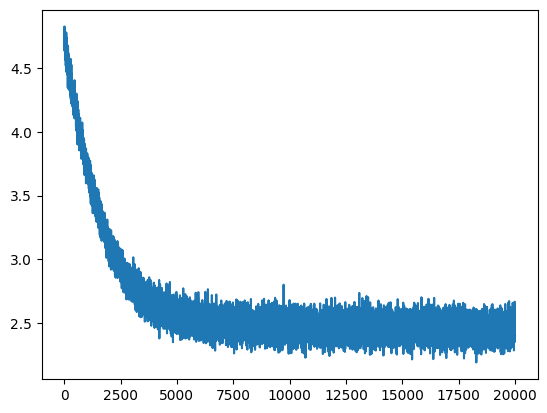

In [273]:
plt.plot(range(len(lossi)), lossi)

In [278]:
# Generate text from the model

start_idx = torch.zeros((1,1), dtype=torch.long)
generation = model.generate(idx=start_idx, max_new_tokens=500)[0]
decoded_generation = decode(generation.tolist())
print(decoded_generation)


Catiseg trill h olave a I mber. de liell, forate o'tad gavisores; el y o ound pal wineatse.
NN gumele caran tr.

Boull ie, IXElitso thiour tf the, tise gematath'elld ourknrdovirou Inavene s

RNGuancern jern:
ORIme pis ne d ltharowid, AUshigounometinindofree thiay mps an y
Joor:
Whareave s s inapre,
BUL: m-be tit sonerayole.
D andu lfo s tangreshat,
KE:
crrser:
Lard-boun lin, h washimammene s joullabulll, sed in;
KIt my t ake bend S nourdl thans fenad ome dime w, k myoug, d thiso Grwonon
Gourd as
